## Proyecto del Día 13 - Juego de Navegación en un Laberinto

Este proyecto tiene como objetivo desarrollar un entorno de laberinto simple y aplicar un algoritmo de **Aprendizaje por Refuerzo** para enseñar a una IA a navegar desde un punto inicial hasta un objetivo.

Dada la naturaleza de este proyecto, considero que el algoritmo más adecuado para este tipo de probleas es **Q-Learning**, por su facilidad de implelentación y comprensión, su estabilidad y su relación entre la exploración y la explotación.

Por esa razón te propongo resolverlo usando ese algoritmo, aunque dejo a tu criterio si quieres resolverlo con otro algoritmo de tu elección. Siempre estaré a favor de que investigues, y expandas las habilidades propuestas por tu cuenta.

### Descripción del Laberinto:

El laberinto se representa como una matriz de dos dimensiones, donde cada elemento puede ser:
+ un camino libre (0)
+ un obstáculo (1)
+ el objetivo (G)

La tarea es desarrollar un agente que pueda aprender a encontrar el camino desde un punto de inicio hasta el objetivo evitando obstáculos.


### Creación del Laberinto

Debido a que el desafío de hoy es bastante complejo, y que el objetivo final no se trata de que sepas desarrollar laberintos, sino sistemas para resolverlos, voy a facilitar la tarea entregando en este cuaderno el código para generar nuestros laberintos.

Tu parte será la siguiente, que es diseñar y entrenar un modelo de Q-Learning para resolver el laberinto de la manera mpas eficiente, y luego mostrar una visualización sobre cómo lo ha hecho.

Te deseo toda la suerte del mundo, y sobre todo, que te diviertas de a montones.

In [4]:
# Librerías necesarias para todo el ejercicio
import numpy as np
import matplotlib.pyplot as plt
import random

In [5]:
#Definicion de parametros 
dimensiones=10

In [6]:
# Función para crear el laberinto
def crear_laberinto(tamanio, porcentaje_paredes=20, inicio=(0, 0), meta=None):
    laberinto = np.zeros((tamanio, tamanio))
    numero_paredes = int((tamanio * tamanio) * porcentaje_paredes / 100)
    
    # Ubicar paredes
    for pared in range(numero_paredes):
        x, y = random.randint(0, tamanio-1), random.randint(0, tamanio-1)
        
        # Cuidar que inicio y meta no sean paredes
        if (x, y) != inicio and (meta is None or (x, y) != meta):
            laberinto[x, y] = 1
            
    # Ubicar la meta
    if meta:
        laberinto[meta] = 9  # Representa la meta con 9
    else:
        # Ubicar la meta aleatoriamente si no está especificado
        while True:
            x, y = random.randint(0, tamanio-1), random.randint(0, tamanio-1)
            if laberinto[x, y] == 0 and (x, y) != inicio:
                laberinto[x, y] = 9
                break
    
    return laberinto

In [7]:
# Función para visualizar el laberinto
def ver_laberinto(laberinto):
    plt.figure(figsize=(5, 5))
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    plt.colorbar();

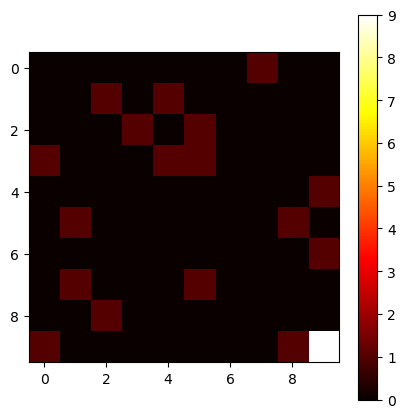

In [69]:
# Ejemplo de crear y mostrar laberintos
laberinto = crear_laberinto(dimensiones, 20, inicio=(0, 0), meta=(9, 9))
ver_laberinto(laberinto)

### Ahora te toca a ti

Lo que sigue es implementar todo el código para que un algoritmo de Q-Learning encuentre la manera más eficiente de llegar a la meta. Voy a dejarte los pasos que considero que son los necesarios para lograrlo

##### 1. Parámetros para el algoritmo Q-Learning

In [203]:
#First definitions 
acciones = [(-1, 0), (1, 0), (0, -1), (0, 1)]
num_estados = dimensiones * dimensiones
num_acciones = len(acciones)
Q = np.zeros((num_estados, num_acciones))

dimensiones=10
estado_inicial=(0,0)
estado_objetivo=(dimensiones-1,dimensiones-1)
porcentaje_paredes=20

##### 2. Función para elegir acciones equilibrando entre explotación y exploración

In [226]:
def elegir_accion(estado,epsilon):
    if random.uniform(0, 1) < epsilon:
        return random.choice(range(num_acciones))
    else:
        return np.argmax(Q[estado_a_indice(estado)])

##### 3. Función para simular la acción en el laberinto

In [209]:
def aplicar_accion(estado, accion_idx):
    accion = acciones[accion_idx]
    nuevo_estado = tuple(np.add(estado, accion) % dimensiones)

    if laberinto[nuevo_estado[0],nuevo_estado[1]] == 1 or nuevo_estado == estado:
        return estado, -100, False
        
    if nuevo_estado == estado_objetivo:
        return nuevo_estado, 250, True
        
    return nuevo_estado, -2, False

##### 4. Función principal para ejecutar el algoritmo Q-Learning

In [212]:
def entrenamiento(epsilon, epsilon_decay):
    for episodio in range(episodios):
        estado = estado_inicial
        terminado = False
        contador=0
        
        while not terminado:
           
            idx_estado = estado_a_indice(estado)
            accion_idx = elegir_accion(estado,epsilon)
            nuevo_estado, recompensa, terminado = aplicar_accion(estado, accion_idx)
            idx_nuevo_estado = estado_a_indice(nuevo_estado)
            Q[idx_estado, accion_idx] = Q[idx_estado, accion_idx] + alpha * (recompensa + gamma * np.max(Q[idx_nuevo_estado]) - Q[idx_estado, accion_idx])
            
            estado = nuevo_estado
            contador+=1
            if contador == 200:
                terminado= True
                
    epsilon = max(epsilon - epsilon_decay, 0)

##### 5. Función para convertir coordenadas a índice lineal

In [215]:
def estado_a_indice(estado):
    return estado[0] * dimensiones + estado[1]

##### 6. Iniciar el laberinto y configurar el algoritmo Q-Learning

In [218]:
laberinto = crear_laberinto(dimensiones, porcentaje_paredes, inicio=estado_inicial, meta=estado_objetivo)

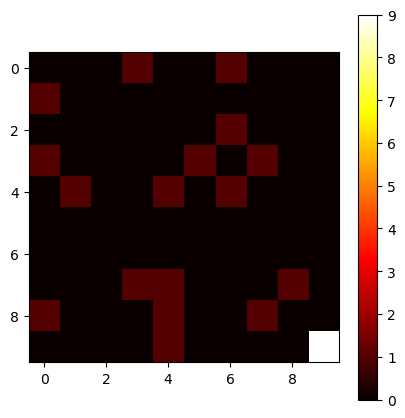

In [220]:
ver_laberinto(laberinto)

In [222]:
#Hyperparameters
alpha = 0.1
gamma = 0.8
episodios = 1000
epsilon = 1.0          
epsilon_decay = 0.001 

In [233]:
entrenamiento(epsilon,epsilon_decay)

##### 7. Función para mostrar el aprendizaje del agente

In [228]:
def visualizar_resultado():
    politica = np.zeros((dimensiones,dimensiones), dtype=int)
    politica
    for i in range(dimensiones):
        for j in range(dimensiones):
            estado = (i, j)
            idx_estado = estado_a_indice(estado)
            mejor_accion = np.argmax(Q[idx_estado])
            politica[i, j] = mejor_accion
            
    print("Política aprendida (0: arriba, 1: abajo, 2: izquierda, 3: derecha)")
    print(politica)

##### 8. Visualizar el resultado

In [235]:
visualizar_resultado()

Política aprendida (0: arriba, 1: abajo, 2: izquierda, 3: derecha)
[[0 0 0 0 3 0 0 3 3 0]
 [0 0 0 2 2 3 3 3 0 0]
 [2 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 3 0]
 [2 0 0 0 0 1 0 3 3 0]
 [1 1 1 1 2 1 1 1 1 1]
 [2 1 1 2 2 3 1 3 3 1]
 [2 1 1 0 0 1 1 2 0 1]
 [0 1 1 1 0 1 1 0 3 1]
 [2 2 2 2 0 3 3 3 3 0]]
